In [1]:
import fastai
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
model = simple_cnn((3,16,16,2))

num_it = 100
start_lr = 1e-7
learn = Learner(data, model, metrics=[accuracy])
a = int(np.ceil(num_it/len(learn.data.train_dl)))
learn.fit(a, start_lr, callbacks=callbacks.LRFinderPlus(learn))
 
# HERE 
# -> a means to run on GPU machine whilst editing the code
# -> test with CIFAR10 on resnet52 -> repro fig 1a
# -> fix progress bar
# -> prepare and submit issue / PR

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [2]:
path = untar_data(URLs.CIFAR)
data = ImageDataBunch.from_folder(path, valid_pct=0.1)
learn = create_cnn(data, models.resnet18, metrics=[accuracy])

num_it = 5
start_lr = 1e-7
a = int(np.ceil(num_it/len(learn.data.train_dl)))

learn.fit(a, start_lr, callbacks=callbacks.LRFinderPlus(learn))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

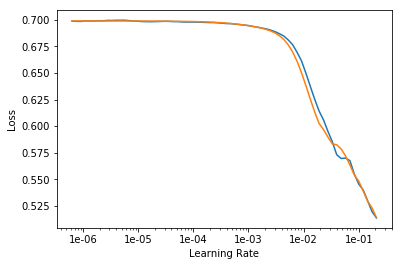

In [3]:
lrs = learn.recorder.lrs
skip_start = 10
skip_end = 20

lrs = lrs[skip_start:-skip_end] if skip_end > 0 else lrs[skip_start:]

losses = learn.recorder.losses
losses = losses[skip_start:-skip_end] if skip_end > 0 else losses[skip_start:]

val_losses = learn.recorder.val_losses
val_losses = val_losses[skip_start:-skip_end] if skip_end > 0 else val_losses[skip_start:]

_, ax = plt.subplots(1,1)
ax.plot(lrs, losses)
ax.plot(lrs, val_losses)

ax.set_ylabel("Loss")
ax.set_xlabel("Learning Rate")
ax.set_xscale('log')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))

In [69]:
#learn.recorder
#learn.recorder.val_losses
#learn.recorder.losses

In [1]:
    def on_batch_end(self, iteration:int, smooth_loss:TensorOrNumber, **kwargs:Any)->None:
        "TODO: docstring"
        print(kwargs['train'])
        
        if False:
            if iteration==0 or smooth_loss < self.best_val_loss: self.best_val_loss = smooth_loss
            # NB: do *not* step if this is not a training batch
            # We use the smoothed loss to decide on the stopping since it's less shaky.
            if self.stop_div and (smooth_loss > 4*self.best_val_loss or torch.isnan(smooth_loss)):
                self.stop=True
                return True
        else:
            self.learn.validate(self.valid_dl)
            if iteration==0 or smooth_loss < self.best_trn_loss: self.best_trn_loss = smooth_loss
            self.opt.lr = self.sched.step()
            if self.sched.is_done:
                self.stop=True
                return True


NameError: name 'TensorOrNumber' is not defined